In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
import time

In [2]:
import requests
from bs4 import BeautifulSoup  
import pandas as pd
import time
import re
import urllib

In [3]:
import googletrans
from googletrans import *
translator = googletrans.Translator()
def translating_to_english(r):
    translation = r.apply(translator.translate, src='auto', dest='en').apply(getattr, args=('text',))
    return translation

In [4]:
def web_scrap(current_url):
    browser = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    browser.get(current_url)
    username=browser.find_elements(By.XPATH,"//span[contains(@class,'a-profile-name')]")
    usernames=[]
    for user in range(len(username)):
        usernames.append((username[user].text).strip())
    usernames=usernames[2:]
    
    
    review = browser.find_elements(By.XPATH,"//span[@class='a-size-base review-text review-text-content']")
    reviews=[]
    for r in range(len(review)):
        reviews.append((review[r].text).strip())

    star = browser.find_elements(By.XPATH,'//span[@class="a-icon-alt"]')
    st=[]
    for value in star:
        rating = value.get_attribute('textContent')    
        st.append(rating)
    st=st[3:]

    date= browser.find_elements(By.XPATH,'//span[@class="a-size-base a-color-secondary review-date"]')
    dates=[]
    for d in range(len(date)):
        dates.append((date[d].text).strip())
    #print(dates)
    dates=dates[2:]
    
    final=pd.DataFrame(list(zip(usernames,reviews,st,dates)),columns=['Reviewer','Review','Stars','Dates'])
    return final


In [5]:
browser = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
url='https://www.amazon.com/Newest-HP-Pavilion-7-5700U-i7-1180G7/product-reviews/B09QS7W8G5/ref=cm_cr_getr_d_paging_btm_next_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1'
browser.get(url)
df=web_scrap(url)
new_df=df
for i in range(2,5):
    url='https://www.amazon.com/Newest-HP-Pavilion-7-5700U-i7-1180G7/product-reviews/B09QS7W8G5/ref=cm_cr_getr_d_paging_btm_next_'+str(i)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    df=web_scrap(url)
    new_df=new_df.append(df,ignore_index=True)
new_df['Product_Name']='2022 Newest HP Pavilion 15.6" FHD 1080P IPS Laptop, 8-Core AMD Ryzen 7-5700U'

    
    

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.58M/6.58M [00:20<00:00, 34.3MB/s]

In [6]:
new_df

,Reviewer,Review,Stars,Dates,Product_Name
0,jackhandy,i do audio work for video games: creating sfx ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
1,Trayson Lancaster,"I've had this laptop for a week now, which has...",4.0 out of 5 stars,"Reviewed in the United States on November 4, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
2,Suraj,Its a pretty good laptop very fast and good wi...,4.0 out of 5 stars,"Reviewed in the United States on December 2, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
3,Will Coats,No Backlight on the keyboard and the keys are ...,4.0 out of 5 stars,"Reviewed in the United States on November 10, ...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
4,Puck,This is by far the fastest laptop I have ever ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
5,Ricardo Y Cabral Lopes Dias,It worth,4.0 out of 5 stars,"Reviewed in the United States on October 3, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
6,Ovie Joshua,My wife loves it.,5.0 out of 5 stars,"Reviewed in the United States on October 28, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
7,John A. Chemycz,The Ryzen chip is very fast and there is no la...,4.0 out of 5 stars,"Reviewed in the United States on April 6, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
8,Dmitry Garanin,"I bought this laptop for scientific computing,...",4.0 out of 5 stars,"Reviewed in the United States on February 9, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
9,Karen S. Cole,I like this HP Pavilion. I've owned several HP...,5.0 out of 5 stars,"Reviewed in the United States on June 18, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."


In [7]:
for i in range(1,10):
    url='https://www.amazon.com/HP-14-Laptop-Dual-Core-Processor/product-reviews/B09VRX9YVW/ref=cm_cr_arp_d_paging_btm_next_'+str(i)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    df1=web_scrap(url)
    new_df=new_df.append(df1,ignore_index=True)
    #new_df['Product_Name']='Newest HP 14" HD Laptop, Windows 11, Intel Celeron Dual-Core Processor Up to 2.60GHz, 4GB RAM, 64GB SSD'

In [8]:
new_df['Product_Name']=new_df['Product_Name'].fillna(value='Newest HP 14" HD Laptop, Windows 11, Intel Celeron Dual-Core Processor Up to 2.60GHz, 4GB RAM, 64GB SSD')

In [9]:
new_df

,Reviewer,Review,Stars,Dates,Product_Name
0,jackhandy,i do audio work for video games: creating sfx ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
1,Trayson Lancaster,"I've had this laptop for a week now, which has...",4.0 out of 5 stars,"Reviewed in the United States on November 4, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
2,Suraj,Its a pretty good laptop very fast and good wi...,4.0 out of 5 stars,"Reviewed in the United States on December 2, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
3,Will Coats,No Backlight on the keyboard and the keys are ...,4.0 out of 5 stars,"Reviewed in the United States on November 10, ...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
4,Puck,This is by far the fastest laptop I have ever ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
...,...,...,...,...,...
125,Kateri,This product came in impeccable condition! I w...,5.0 out of 5 stars,Reviewed in the United States 🇺🇸 on November 6...,"Newest HP 14"" HD Laptop, Windows 11, Intel Cel..."
126,Allison Grubbs,Bought to get Microsoft accessibility for onli...,5.0 out of 5 stars,Reviewed in the United States 🇺🇸 on September ...,"Newest HP 14"" HD Laptop, Windows 11, Intel Cel..."
127,Linda B,"Great computer. 3 USB ports, 1 HDMI, extra sto...",5.0 out of 5 stars,"Reviewed in the United States 🇺🇸 on July 28, 2022","Newest HP 14"" HD Laptop, Windows 11, Intel Cel..."
128,faith barber,i bought this laptop for my husband and he lov...,5.0 out of 5 stars,"Reviewed in the United States 🇺🇸 on August 2, ...","Newest HP 14"" HD Laptop, Windows 11, Intel Cel..."


In [10]:
url='https://www.amazon.com/HP-Pavilion-Micro-EDGE-Processor-15-dk0020nr/product-reviews/B07SC6HG74/ref=cm_cr_arp_d_paging_btm_next_1?ie=UTF8&reviewerType=all_reviews&pageNumber=1'
browser = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
browser.get(url)
time.sleep(4)
df2=web_scrap(url)
new_df=new_df.append(df2,ignore_index=True)
for i in range(2,10):
    url='https://www.amazon.com/HP-Pavilion-Micro-EDGE-Processor-15-dk0020nr/product-reviews/B09VRX9YVW/ref=cm_cr_arp_d_paging_btm_next_'+str(i)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    df2=web_scrap(url)
    new_df=new_df.append(df2,ignore_index=True)
new_df['Product_Name']=new_df['Product_Name'].fillna(value='HP-Pavilion-Micro-EDGE-Processor-15')

In [11]:
new_df['Product_Name'].value_counts()

Newest HP 14" HD Laptop, Windows 11, Intel Celeron Dual-Core Processor Up to 2.60GHz, 4GB RAM, 64GB SSD    90
HP-Pavilion-Micro-EDGE-Processor-15                                                                        90
2022 Newest HP Pavilion 15.6" FHD 1080P IPS Laptop, 8-Core AMD Ryzen 7-5700U                               40
Name: Product_Name, dtype: int64

In [12]:
new_df=new_df.drop_duplicates(ignore_index=True)

In [13]:
for i in range(1,22):
    url='https://www.amazon.com/HP-Chromebook-11-inch-Laptop-11a-na0010nr/product-reviews/B08HJT1BKQ/ref=cm_cr_arp_d_paging_btm_next_'+str(i)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    df3=web_scrap(url)
    new_df=new_df.append(df3,ignore_index=True)
new_df['Product_Name']=new_df['Product_Name'].fillna(value='HP-Chromebook-11-inch-Laptop')

In [14]:
for i in range(1,15):
    url='https://www.amazon.com/Newest-HP-R5-5500U-Microphone-Windows/product-reviews/B09VRX9YVW/ref=cm_cr_arp_d_paging_btm_next_'+str(i)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    df4=web_scrap(url)
    new_df=new_df.append(df4,ignore_index=True)
new_df['Product_Name']=new_df['Product_Name'].fillna(value='Newest-HP-R5-5500U-Microphone-Windows')

In [15]:
new_df['Product_Name'].value_counts()

HP-Chromebook-11-inch-Laptop                                                                               208
Newest-HP-R5-5500U-Microphone-Windows                                                                       91
Newest HP 14" HD Laptop, Windows 11, Intel Celeron Dual-Core Processor Up to 2.60GHz, 4GB RAM, 64GB SSD     90
HP-Pavilion-Micro-EDGE-Processor-15                                                                         90
2022 Newest HP Pavilion 15.6" FHD 1080P IPS Laptop, 8-Core AMD Ryzen 7-5700U                                40
Name: Product_Name, dtype: int64

In [16]:
new_df

,Reviewer,Review,Stars,Dates,Product_Name
0,jackhandy,i do audio work for video games: creating sfx ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
1,Trayson Lancaster,"I've had this laptop for a week now, which has...",4.0 out of 5 stars,"Reviewed in the United States on November 4, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
2,Suraj,Its a pretty good laptop very fast and good wi...,4.0 out of 5 stars,"Reviewed in the United States on December 2, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
3,Will Coats,No Backlight on the keyboard and the keys are ...,4.0 out of 5 stars,"Reviewed in the United States on November 10, ...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
4,Puck,This is by far the fastest laptop I have ever ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
...,...,...,...,...,...
514,Allison Grubbs,Bought to get Microsoft accessibility for onli...,5.0 out of 5 stars,Reviewed in the United States 🇺🇸 on September ...,Newest-HP-R5-5500U-Microphone-Windows
515,Linda B,"Great computer. 3 USB ports, 1 HDMI, extra sto...",5.0 out of 5 stars,"Reviewed in the United States 🇺🇸 on July 28, 2022",Newest-HP-R5-5500U-Microphone-Windows
516,faith barber,i bought this laptop for my husband and he lov...,5.0 out of 5 stars,"Reviewed in the United States 🇺🇸 on August 2, ...",Newest-HP-R5-5500U-Microphone-Windows
517,Amazon Customer,This was a great buy. It’s a keeper for sure. ...,5.0 out of 5 stars,"Reviewed in the United States 🇺🇸 on August 18,...",Newest-HP-R5-5500U-Microphone-Windows


In [17]:
for i in range(1,14):
    url='https://www.amazon.com/HP-Portable-Micro-Edge-Anti-Glare-14-fq1025nr/product-reviews/B09G8SK2KK/ref=cm_cr_arp_d_paging_btm_next_'+str(i)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    df5=web_scrap(url)
    new_df=new_df.append(df5,ignore_index=True)
new_df['Product_Name']=new_df['Product_Name'].fillna(value='HP-Portable-Micro-Edge-Anti-Glare-14')

In [18]:
for i in range(1,37):
    url='https://www.amazon.com/HP-Generation-i5-1135G7-Graphics-15-dy2024nr/product-reviews/B09FXFDGN3/ref=cm_cr_arp_d_paging_btm_next_'+str(i)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    df6=web_scrap(url)
    new_df=new_df.append(df6,ignore_index=True)
new_df['Product_Name']=new_df['Product_Name'].fillna(value='HP-Generation-i5-1135G7-Graphics-15')

In [19]:
new_df

,Reviewer,Review,Stars,Dates,Product_Name
0,jackhandy,i do audio work for video games: creating sfx ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
1,Trayson Lancaster,"I've had this laptop for a week now, which has...",4.0 out of 5 stars,"Reviewed in the United States on November 4, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
2,Suraj,Its a pretty good laptop very fast and good wi...,4.0 out of 5 stars,"Reviewed in the United States on December 2, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
3,Will Coats,No Backlight on the keyboard and the keys are ...,4.0 out of 5 stars,"Reviewed in the United States on November 10, ...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
4,Puck,This is by far the fastest laptop I have ever ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
...,...,...,...,...,...
1004,Bruce Runyan,Great price for all the features,5.0 out of 5 stars,"Reviewed in the United States on September 10,...",HP-Generation-i5-1135G7-Graphics-15
1005,Heather Hendershott,Got this for my 17 year old son for school. It...,5.0 out of 5 stars,"Reviewed in the United States on April 26, 2022",HP-Generation-i5-1135G7-Graphics-15
1006,John D Rutledge,"Perfect for my needs. Got as a ""deal""... great...",5.0 out of 5 stars,"Reviewed in the United States on August 29, 2022",HP-Generation-i5-1135G7-Graphics-15
1007,rosa,"Works perfectly, love it.",5.0 out of 5 stars,"Reviewed in the United States on April 30, 2022",HP-Generation-i5-1135G7-Graphics-15


In [20]:
new_df['Product_Name'].value_counts()

HP-Generation-i5-1135G7-Graphics-15                                                                        360
HP-Chromebook-11-inch-Laptop                                                                               208
HP-Portable-Micro-Edge-Anti-Glare-14                                                                       130
Newest-HP-R5-5500U-Microphone-Windows                                                                       91
Newest HP 14" HD Laptop, Windows 11, Intel Celeron Dual-Core Processor Up to 2.60GHz, 4GB RAM, 64GB SSD     90
HP-Pavilion-Micro-EDGE-Processor-15                                                                         90
2022 Newest HP Pavilion 15.6" FHD 1080P IPS Laptop, 8-Core AMD Ryzen 7-5700U                                40
Name: Product_Name, dtype: int64

In [21]:
for i in range(1,11):
    url='https://www.amazon.com/HP-Generation-i5-1135G7-Graphics-17-cn0025nr/product-reviews/B09FXLRBFQ/ref=cm_cr_arp_d_paging_btm_next_'+str(i)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i) 
    df7=web_scrap(url)
    new_df=new_df.append(df7,ignore_index=True)
new_df['Product_Name']=new_df['Product_Name'].fillna(value='HP-Generation-i5-1135G7-Graphics-17')


[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.58M/6.58M [11:04<00:00, 10.4kB/s]


In [22]:
for i in range(1,9):
    url='https://www.amazon.com/HP-Generation-Graphics-Bluetooth-17-by4025nr/product-reviews/B09TG4XXYD/ref=cm_cr_arp_d_paging_btm_next_'+str(i)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    df7=web_scrap(url)
    new_df=new_df.append(df7,ignore_index=True)
new_df['Product_Name']=new_df['Product_Name'].fillna(value='HP-Generation-Graphics-Bluetooth-17')


In [23]:
new_df

,Reviewer,Review,Stars,Dates,Product_Name
0,jackhandy,i do audio work for video games: creating sfx ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
1,Trayson Lancaster,"I've had this laptop for a week now, which has...",4.0 out of 5 stars,"Reviewed in the United States on November 4, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
2,Suraj,Its a pretty good laptop very fast and good wi...,4.0 out of 5 stars,"Reviewed in the United States on December 2, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
3,Will Coats,No Backlight on the keyboard and the keys are ...,4.0 out of 5 stars,"Reviewed in the United States on November 10, ...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
4,Puck,This is by far the fastest laptop I have ever ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
...,...,...,...,...,...
1182,richard d.,"Product won't boot up, less then 4 months old ...",1.0 out of 5 stars,"Reviewed in the United States on November 5, 2022",HP-Generation-Graphics-Bluetooth-17
1183,nathaniel c.,Totally not knowledgeable at all,1.0 out of 5 stars,"Reviewed in the United States on November 25, ...",HP-Generation-Graphics-Bluetooth-17
1184,Joy,I do not like the keys.,1.0 out of 5 stars,"Reviewed in the United States on November 16, ...",HP-Generation-Graphics-Bluetooth-17
1185,Pam D.,No chance to CK performance. I'm rcv'g disc er...,1.0 out of 5 stars,"Reviewed in the United States on October 4, 2022",HP-Generation-Graphics-Bluetooth-17


In [24]:
for i in range(1,33):
    url='https://www.amazon.com/Flagship-HP-Chromebook-Anti-Glare-Processor/product-reviews/B08PDTLK1Q/ref=cm_cr_arp_d_paging_btm_next_'+str(i)+'?ie=UTF8&reviewerType=all_reviews&pageNumber='+str(i)
    df8=web_scrap(url)
    new_df=new_df.append(df8,ignore_index=True)
new_df['Product_Name']=new_df['Product_Name'].fillna(value='HP-Chromebook-Anti-Glare-Processor')


In [25]:
new_df

,Reviewer,Review,Stars,Dates,Product_Name
0,jackhandy,i do audio work for video games: creating sfx ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
1,Trayson Lancaster,"I've had this laptop for a week now, which has...",4.0 out of 5 stars,"Reviewed in the United States on November 4, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
2,Suraj,Its a pretty good laptop very fast and good wi...,4.0 out of 5 stars,"Reviewed in the United States on December 2, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
3,Will Coats,No Backlight on the keyboard and the keys are ...,4.0 out of 5 stars,"Reviewed in the United States on November 10, ...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
4,Puck,This is by far the fastest laptop I have ever ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
...,...,...,...,...,...
1502,Fernanda del Río,"Ligera, facil de usar, excelente relación cali...",5.0 out of 5 stars,"Reviewed in Mexico on July 11, 2021",HP-Chromebook-Anti-Glare-Processor
1503,Emmanuel,Esta muy ligera y práctica! Me encantó!,5.0 out of 5 stars,"Reviewed in Mexico on July 16, 2021",HP-Chromebook-Anti-Glare-Processor
1504,MARIO C.,Buen dispositivo pago justo por lo que brinda,5.0 out of 5 stars,"Reviewed in Mexico on July 3, 2021",HP-Chromebook-Anti-Glare-Processor
1505,Enrique Valencia,Una muy buena computadora por un precio muy ac...,5.0 out of 5 stars,"Reviewed in Mexico on June 27, 2021",HP-Chromebook-Anti-Glare-Processor


In [26]:
new_df.duplicated().sum()

0

In [27]:
new_df.drop_duplicates(inplace=True, ignore_index=True)

In [28]:
new_df

,Reviewer,Review,Stars,Dates,Product_Name
0,jackhandy,i do audio work for video games: creating sfx ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
1,Trayson Lancaster,"I've had this laptop for a week now, which has...",4.0 out of 5 stars,"Reviewed in the United States on November 4, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
2,Suraj,Its a pretty good laptop very fast and good wi...,4.0 out of 5 stars,"Reviewed in the United States on December 2, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
3,Will Coats,No Backlight on the keyboard and the keys are ...,4.0 out of 5 stars,"Reviewed in the United States on November 10, ...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
4,Puck,This is by far the fastest laptop I have ever ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
...,...,...,...,...,...
1502,Fernanda del Río,"Ligera, facil de usar, excelente relación cali...",5.0 out of 5 stars,"Reviewed in Mexico on July 11, 2021",HP-Chromebook-Anti-Glare-Processor
1503,Emmanuel,Esta muy ligera y práctica! Me encantó!,5.0 out of 5 stars,"Reviewed in Mexico on July 16, 2021",HP-Chromebook-Anti-Glare-Processor
1504,MARIO C.,Buen dispositivo pago justo por lo que brinda,5.0 out of 5 stars,"Reviewed in Mexico on July 3, 2021",HP-Chromebook-Anti-Glare-Processor
1505,Enrique Valencia,Una muy buena computadora por un precio muy ac...,5.0 out of 5 stars,"Reviewed in Mexico on June 27, 2021",HP-Chromebook-Anti-Glare-Processor


## Performing Data Cleaning

In [29]:
new_df.isna().sum() #This is used to find if any null values are present in the dataset

Reviewer        0
Review          0
Stars           0
Dates           0
Product_Name    0
dtype: int64

In [30]:
new_df.duplicated().sum() #This is to check if any duplicated values are present in the dataset

0

In [31]:
new_df['Review'] = new_df['Review'].astype(str) #changing datatype to string
new_df['Review'] = new_df['Review'].apply(translator.translate, src='auto', dest='en').apply(getattr, args=('text',))
new_df

,Reviewer,Review,Stars,Dates,Product_Name
0,jackhandy,i do audio work for video games: creating sfx ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
1,Trayson Lancaster,"I've had this laptop for a week now, which has...",4.0 out of 5 stars,"Reviewed in the United States on November 4, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
2,Suraj,Its a pretty good laptop very fast and good wi...,4.0 out of 5 stars,"Reviewed in the United States on December 2, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
3,Will Coats,No Backlight on the keyboard and the keys are ...,4.0 out of 5 stars,"Reviewed in the United States on November 10, ...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
4,Puck,This is by far the fastest laptop I have ever ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
...,...,...,...,...,...
1502,Fernanda del Río,"Light, easy to use, excellent value for money....",5.0 out of 5 stars,"Reviewed in Mexico on July 11, 2021",HP-Chromebook-Anti-Glare-Processor
1503,Emmanuel,It is very light and practical! I loved!,5.0 out of 5 stars,"Reviewed in Mexico on July 16, 2021",HP-Chromebook-Anti-Glare-Processor
1504,MARIO C.,"Good device, fair payment for what it provides",5.0 out of 5 stars,"Reviewed in Mexico on July 3, 2021",HP-Chromebook-Anti-Glare-Processor
1505,Enrique Valencia,A very good computer for a very affordable price,5.0 out of 5 stars,"Reviewed in Mexico on June 27, 2021",HP-Chromebook-Anti-Glare-Processor


In [32]:
new_df

,Reviewer,Review,Stars,Dates,Product_Name
0,jackhandy,i do audio work for video games: creating sfx ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
1,Trayson Lancaster,"I've had this laptop for a week now, which has...",4.0 out of 5 stars,"Reviewed in the United States on November 4, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
2,Suraj,Its a pretty good laptop very fast and good wi...,4.0 out of 5 stars,"Reviewed in the United States on December 2, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
3,Will Coats,No Backlight on the keyboard and the keys are ...,4.0 out of 5 stars,"Reviewed in the United States on November 10, ...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
4,Puck,This is by far the fastest laptop I have ever ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La..."
...,...,...,...,...,...
1502,Fernanda del Río,"Light, easy to use, excellent value for money....",5.0 out of 5 stars,"Reviewed in Mexico on July 11, 2021",HP-Chromebook-Anti-Glare-Processor
1503,Emmanuel,It is very light and practical! I loved!,5.0 out of 5 stars,"Reviewed in Mexico on July 16, 2021",HP-Chromebook-Anti-Glare-Processor
1504,MARIO C.,"Good device, fair payment for what it provides",5.0 out of 5 stars,"Reviewed in Mexico on July 3, 2021",HP-Chromebook-Anti-Glare-Processor
1505,Enrique Valencia,A very good computer for a very affordable price,5.0 out of 5 stars,"Reviewed in Mexico on June 27, 2021",HP-Chromebook-Anti-Glare-Processor


In [33]:
# We have already treated with the dirty data(Some of the reviews were in spanish language).
# So, we have translated it with google translator. 

In [34]:
#Extracting Location from Dates field
def extract_location(x):
    sub1 = "in"
    sub2 = "on"
    index1 = x.find(sub1)
    index2 = x.find(sub2)
    result = x[index1 + len(sub1) + 1: index2]
    return result

In [35]:
new_df['Reviewed_at']=new_df['Dates'].apply(extract_location) #Calling the function

In [36]:
new_df['Reviewed_at'].value_counts() #Checking whether proper data is scrapped or not

the United States 🇺🇸     793
the United States        670
Mexico                    24
Mexico 🇲🇽                 15
Germany                    3
Australia                  1
Canada 🇨🇦                  1
Name: Reviewed_at, dtype: int64

In [37]:
new_df['Reviewed_at']=new_df['Reviewed_at'].replace({'United States 🇺🇸 ':'United States','United States 🇺🇸 🇺🇸':'United States','United States 🇺🇸  🇺🇸 🇺🇸':'United States','Mexico 🇲🇽':'Mexico'},regex=True) 
#Replacing the data

In [38]:
new_df['Reviewed_at']

0       the United States 
1       the United States 
2       the United States 
3       the United States 
4       the United States 
               ...        
1502               Mexico 
1503               Mexico 
1504               Mexico 
1505               Mexico 
1506               Mexico 
Name: Reviewed_at, Length: 1507, dtype: object

In [39]:
#Extracting Date from Dates field
def extract_date(x):
    sub1 = "on"
    index1 = x.find(sub1)
    result = x[index1 + len(sub1) + 1:]
    return result

In [40]:
new_df

,Reviewer,Review,Stars,Dates,Product_Name,Reviewed_at
0,jackhandy,i do audio work for video games: creating sfx ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States
1,Trayson Lancaster,"I've had this laptop for a week now, which has...",4.0 out of 5 stars,"Reviewed in the United States on November 4, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States
2,Suraj,Its a pretty good laptop very fast and good wi...,4.0 out of 5 stars,"Reviewed in the United States on December 2, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States
3,Will Coats,No Backlight on the keyboard and the keys are ...,4.0 out of 5 stars,"Reviewed in the United States on November 10, ...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States
4,Puck,This is by far the fastest laptop I have ever ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States
...,...,...,...,...,...,...
1502,Fernanda del Río,"Light, easy to use, excellent value for money....",5.0 out of 5 stars,"Reviewed in Mexico on July 11, 2021",HP-Chromebook-Anti-Glare-Processor,Mexico
1503,Emmanuel,It is very light and practical! I loved!,5.0 out of 5 stars,"Reviewed in Mexico on July 16, 2021",HP-Chromebook-Anti-Glare-Processor,Mexico
1504,MARIO C.,"Good device, fair payment for what it provides",5.0 out of 5 stars,"Reviewed in Mexico on July 3, 2021",HP-Chromebook-Anti-Glare-Processor,Mexico
1505,Enrique Valencia,A very good computer for a very affordable price,5.0 out of 5 stars,"Reviewed in Mexico on June 27, 2021",HP-Chromebook-Anti-Glare-Processor,Mexico


In [41]:
new_df['Date_of_Review']=new_df['Dates'].apply(extract_date)

In [42]:
new_df

,Reviewer,Review,Stars,Dates,Product_Name,Reviewed_at,Date_of_Review
0,jackhandy,i do audio work for video games: creating sfx ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"September 24, 2022"
1,Trayson Lancaster,"I've had this laptop for a week now, which has...",4.0 out of 5 stars,"Reviewed in the United States on November 4, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"November 4, 2022"
2,Suraj,Its a pretty good laptop very fast and good wi...,4.0 out of 5 stars,"Reviewed in the United States on December 2, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"December 2, 2022"
3,Will Coats,No Backlight on the keyboard and the keys are ...,4.0 out of 5 stars,"Reviewed in the United States on November 10, ...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"November 10, 2022"
4,Puck,This is by far the fastest laptop I have ever ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"September 24, 2022"
...,...,...,...,...,...,...,...
1502,Fernanda del Río,"Light, easy to use, excellent value for money....",5.0 out of 5 stars,"Reviewed in Mexico on July 11, 2021",HP-Chromebook-Anti-Glare-Processor,Mexico,"July 11, 2021"
1503,Emmanuel,It is very light and practical! I loved!,5.0 out of 5 stars,"Reviewed in Mexico on July 16, 2021",HP-Chromebook-Anti-Glare-Processor,Mexico,"July 16, 2021"
1504,MARIO C.,"Good device, fair payment for what it provides",5.0 out of 5 stars,"Reviewed in Mexico on July 3, 2021",HP-Chromebook-Anti-Glare-Processor,Mexico,"July 3, 2021"
1505,Enrique Valencia,A very good computer for a very affordable price,5.0 out of 5 stars,"Reviewed in Mexico on June 27, 2021",HP-Chromebook-Anti-Glare-Processor,Mexico,"June 27, 2021"


In [43]:
new_df['Stars_out_of_5']=new_df['Stars'].str.split(' ').str[0] #Extracting only the ratings from Stars column

In [44]:
new_df

,Reviewer,Review,Stars,Dates,Product_Name,Reviewed_at,Date_of_Review,Stars_out_of_5
0,jackhandy,i do audio work for video games: creating sfx ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"September 24, 2022",5.0
1,Trayson Lancaster,"I've had this laptop for a week now, which has...",4.0 out of 5 stars,"Reviewed in the United States on November 4, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"November 4, 2022",4.0
2,Suraj,Its a pretty good laptop very fast and good wi...,4.0 out of 5 stars,"Reviewed in the United States on December 2, 2022","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"December 2, 2022",4.0
3,Will Coats,No Backlight on the keyboard and the keys are ...,4.0 out of 5 stars,"Reviewed in the United States on November 10, ...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"November 10, 2022",4.0
4,Puck,This is by far the fastest laptop I have ever ...,5.0 out of 5 stars,"Reviewed in the United States on September 24,...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"September 24, 2022",5.0
...,...,...,...,...,...,...,...,...
1502,Fernanda del Río,"Light, easy to use, excellent value for money....",5.0 out of 5 stars,"Reviewed in Mexico on July 11, 2021",HP-Chromebook-Anti-Glare-Processor,Mexico,"July 11, 2021",5.0
1503,Emmanuel,It is very light and practical! I loved!,5.0 out of 5 stars,"Reviewed in Mexico on July 16, 2021",HP-Chromebook-Anti-Glare-Processor,Mexico,"July 16, 2021",5.0
1504,MARIO C.,"Good device, fair payment for what it provides",5.0 out of 5 stars,"Reviewed in Mexico on July 3, 2021",HP-Chromebook-Anti-Glare-Processor,Mexico,"July 3, 2021",5.0
1505,Enrique Valencia,A very good computer for a very affordable price,5.0 out of 5 stars,"Reviewed in Mexico on June 27, 2021",HP-Chromebook-Anti-Glare-Processor,Mexico,"June 27, 2021",5.0


In [45]:
del new_df['Dates'] #Deleting the columns as they are of no use

In [46]:
new_df.to_csv('New_data.csv')

In [47]:
new_df

,Reviewer,Review,Stars,Product_Name,Reviewed_at,Date_of_Review,Stars_out_of_5
0,jackhandy,i do audio work for video games: creating sfx ...,5.0 out of 5 stars,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"September 24, 2022",5.0
1,Trayson Lancaster,"I've had this laptop for a week now, which has...",4.0 out of 5 stars,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"November 4, 2022",4.0
2,Suraj,Its a pretty good laptop very fast and good wi...,4.0 out of 5 stars,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"December 2, 2022",4.0
3,Will Coats,No Backlight on the keyboard and the keys are ...,4.0 out of 5 stars,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"November 10, 2022",4.0
4,Puck,This is by far the fastest laptop I have ever ...,5.0 out of 5 stars,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"September 24, 2022",5.0
...,...,...,...,...,...,...,...
1502,Fernanda del Río,"Light, easy to use, excellent value for money....",5.0 out of 5 stars,HP-Chromebook-Anti-Glare-Processor,Mexico,"July 11, 2021",5.0
1503,Emmanuel,It is very light and practical! I loved!,5.0 out of 5 stars,HP-Chromebook-Anti-Glare-Processor,Mexico,"July 16, 2021",5.0
1504,MARIO C.,"Good device, fair payment for what it provides",5.0 out of 5 stars,HP-Chromebook-Anti-Glare-Processor,Mexico,"July 3, 2021",5.0
1505,Enrique Valencia,A very good computer for a very affordable price,5.0 out of 5 stars,HP-Chromebook-Anti-Glare-Processor,Mexico,"June 27, 2021",5.0


In [48]:
del new_df['Stars'] #Deleting the columns as they are of no use

In [49]:
df=new_df
df

,Reviewer,Review,Product_Name,Reviewed_at,Date_of_Review,Stars_out_of_5
0,jackhandy,i do audio work for video games: creating sfx ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"September 24, 2022",5.0
1,Trayson Lancaster,"I've had this laptop for a week now, which has...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"November 4, 2022",4.0
2,Suraj,Its a pretty good laptop very fast and good wi...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"December 2, 2022",4.0
3,Will Coats,No Backlight on the keyboard and the keys are ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"November 10, 2022",4.0
4,Puck,This is by far the fastest laptop I have ever ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"September 24, 2022",5.0
...,...,...,...,...,...,...
1502,Fernanda del Río,"Light, easy to use, excellent value for money....",HP-Chromebook-Anti-Glare-Processor,Mexico,"July 11, 2021",5.0
1503,Emmanuel,It is very light and practical! I loved!,HP-Chromebook-Anti-Glare-Processor,Mexico,"July 16, 2021",5.0
1504,MARIO C.,"Good device, fair payment for what it provides",HP-Chromebook-Anti-Glare-Processor,Mexico,"July 3, 2021",5.0
1505,Enrique Valencia,A very good computer for a very affordable price,HP-Chromebook-Anti-Glare-Processor,Mexico,"June 27, 2021",5.0


# # Performing Exploratory Data Analysis on the dataset

In [50]:
df['Stars_out_of_5']=df['Stars_out_of_5'].astype(float) #Converting string to float
Avg_Rating=df.groupby('Product_Name')['Stars_out_of_5'].mean() #Calculating Mean of averages

In [51]:
Avg_Rating=Avg_Rating.round(2) #Rounding of the Average Ratings of each product

In [52]:
Avg_Rating_df=pd.DataFrame(Avg_Rating)

In [53]:
Avg_Rating_df.reset_index(inplace=True)

In [54]:
Avg_Rating_df

,Product_Name,Stars_out_of_5
0,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",3.85
1,HP-Chromebook-11-inch-Laptop,3.70
2,HP-Chromebook-Anti-Glare-Processor,4.12
3,HP-Generation-Graphics-Bluetooth-17,3.88
4,HP-Generation-i5-1135G7-Graphics-15,3.41
5,HP-Generation-i5-1135G7-Graphics-17,4.04
6,HP-Pavilion-Micro-EDGE-Processor-15,3.40
7,HP-Portable-Micro-Edge-Anti-Glare-14,3.85
8,"Newest HP 14"" HD Laptop, Windows 11, Intel Cel...",3.36
9,Newest-HP-R5-5500U-Microphone-Windows,3.37


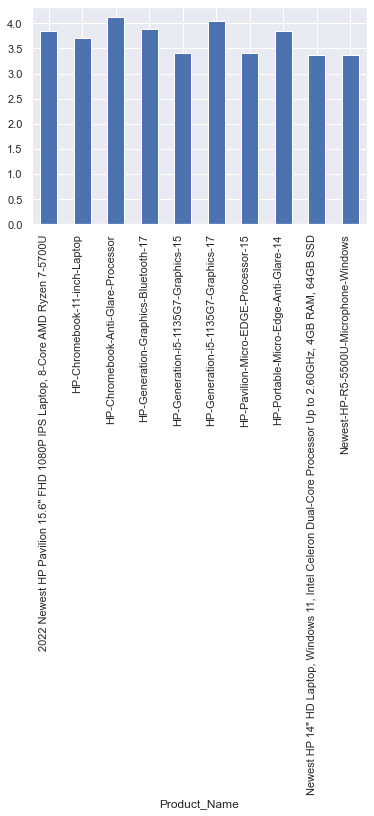

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
fig=Avg_Rating.plot(kind='bar')
fig.set_xticklabels(Avg_Rating_df['Product_Name'], rotation = 90, ha="right")
plt.show()

In [56]:
Avg_Rating_df

,Product_Name,Stars_out_of_5
0,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",3.85
1,HP-Chromebook-11-inch-Laptop,3.70
2,HP-Chromebook-Anti-Glare-Processor,4.12
3,HP-Generation-Graphics-Bluetooth-17,3.88
4,HP-Generation-i5-1135G7-Graphics-15,3.41
5,HP-Generation-i5-1135G7-Graphics-17,4.04
6,HP-Pavilion-Micro-EDGE-Processor-15,3.40
7,HP-Portable-Micro-Edge-Anti-Glare-14,3.85
8,"Newest HP 14"" HD Laptop, Windows 11, Intel Cel...",3.36
9,Newest-HP-R5-5500U-Microphone-Windows,3.37


In [57]:
Reviewed_at_df=new_df.Reviewed_at.value_counts().reset_index()

In [58]:
df

,Reviewer,Review,Product_Name,Reviewed_at,Date_of_Review,Stars_out_of_5
0,jackhandy,i do audio work for video games: creating sfx ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"September 24, 2022",5.0
1,Trayson Lancaster,"I've had this laptop for a week now, which has...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"November 4, 2022",4.0
2,Suraj,Its a pretty good laptop very fast and good wi...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"December 2, 2022",4.0
3,Will Coats,No Backlight on the keyboard and the keys are ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"November 10, 2022",4.0
4,Puck,This is by far the fastest laptop I have ever ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"September 24, 2022",5.0
...,...,...,...,...,...,...
1502,Fernanda del Río,"Light, easy to use, excellent value for money....",HP-Chromebook-Anti-Glare-Processor,Mexico,"July 11, 2021",5.0
1503,Emmanuel,It is very light and practical! I loved!,HP-Chromebook-Anti-Glare-Processor,Mexico,"July 16, 2021",5.0
1504,MARIO C.,"Good device, fair payment for what it provides",HP-Chromebook-Anti-Glare-Processor,Mexico,"July 3, 2021",5.0
1505,Enrique Valencia,A very good computer for a very affordable price,HP-Chromebook-Anti-Glare-Processor,Mexico,"June 27, 2021",5.0


In [59]:
df['Reviewed_at']=df['Reviewed_at'].str.strip()

In [60]:
Reviewed_at_df

,index,Reviewed_at
0,the United States,793
1,the United States,670
2,Mexico,39
3,Germany,3
4,Australia,1
5,Canada 🇨🇦,1


In [61]:
Reviewed_at_df=Reviewed_at_df.rename(columns={"index": "Country"})

In [62]:
new_Country=[]
for i in Reviewed_at_df.Country:
    new_Country.append(i[:])
new_Country
Reviewed_at_df['Country']=new_Country

In [63]:
Reviewed_at_df

,Country,Reviewed_at
0,the United States,793
1,the United States,670
2,Mexico,39
3,Germany,3
4,Australia,1
5,Canada 🇨🇦,1


C:\Users\jimit\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jimit\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jimit\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127464 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\jimit\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 127462 missing from current font.
  font.set_text(s, 0, flags=flags)


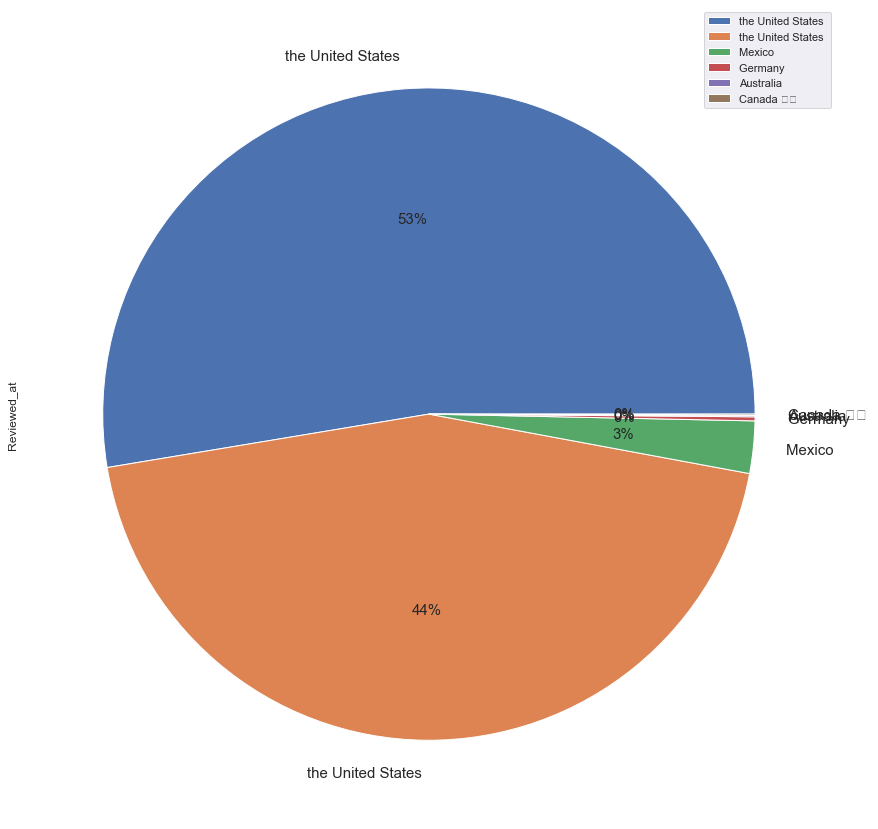

In [64]:
#plt.pie(Reviewed_at_df.Reviewed_at,autopct='%.0f%%',labels=Reviewed_at_df.Country)
index=Reviewed_at_df['Country']
plot = Reviewed_at_df.plot.pie(y='Reviewed_at', figsize=(15, 15),autopct='%.0f%%',fontsize=15, labels=index)

In [65]:
Product_Name_Polarity=new_df.groupby(['Product_Name']).mean().reset_index()

In [66]:
Product_Name_Polarity

,Product_Name,Stars_out_of_5
0,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",3.850000
1,HP-Chromebook-11-inch-Laptop,3.701923
2,HP-Chromebook-Anti-Glare-Processor,4.121875
3,HP-Generation-Graphics-Bluetooth-17,3.875000
4,HP-Generation-i5-1135G7-Graphics-15,3.411111
5,HP-Generation-i5-1135G7-Graphics-17,4.040816
6,HP-Pavilion-Micro-EDGE-Processor-15,3.400000
7,HP-Portable-Micro-Edge-Anti-Glare-14,3.853846
8,"Newest HP 14"" HD Laptop, Windows 11, Intel Cel...",3.355556
9,Newest-HP-R5-5500U-Microphone-Windows,3.373626


In [67]:
# Sentimental Analysis can be useful to quickly summarize the quality of text, 
# especially if you have so much text that a human reader cannot analyze it. 
# For this project,the goal is to to classify reviews based on customers text.

In [68]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [69]:
from textblob import TextBlob
polarity=[] # list which will contain the polarity of the comments

for i in df['Review']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)   
    except:
        polarity.append(0)

In [70]:
df['Polarity']=polarity 

In [71]:
df #If polarity>0, it's a positive review and if it's <0 then, it's negative review

,Reviewer,Review,Product_Name,Reviewed_at,Date_of_Review,Stars_out_of_5,Polarity
0,jackhandy,i do audio work for video games: creating sfx ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"September 24, 2022",5.0,0.152752
1,Trayson Lancaster,"I've had this laptop for a week now, which has...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"November 4, 2022",4.0,0.081711
2,Suraj,Its a pretty good laptop very fast and good wi...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"December 2, 2022",4.0,0.382000
3,Will Coats,No Backlight on the keyboard and the keys are ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"November 10, 2022",4.0,0.156771
4,Puck,This is by far the fastest laptop I have ever ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"September 24, 2022",5.0,0.185908
...,...,...,...,...,...,...,...
1502,Fernanda del Río,"Light, easy to use, excellent value for money....",HP-Chromebook-Anti-Glare-Processor,Mexico,"July 11, 2021",5.0,0.708333
1503,Emmanuel,It is very light and practical! I loved!,HP-Chromebook-Anti-Glare-Processor,Mexico,"July 16, 2021",5.0,0.762500
1504,MARIO C.,"Good device, fair payment for what it provides",HP-Chromebook-Anti-Glare-Processor,Mexico,"July 3, 2021",5.0,0.700000
1505,Enrique Valencia,A very good computer for a very affordable price,HP-Chromebook-Anti-Glare-Processor,Mexico,"June 27, 2021",5.0,0.555000


In [72]:
Positive_Reviews=df[df['Polarity']>0]

In [73]:
Positive_Reviews

,Reviewer,Review,Product_Name,Reviewed_at,Date_of_Review,Stars_out_of_5,Polarity
0,jackhandy,i do audio work for video games: creating sfx ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"September 24, 2022",5.0,0.152752
1,Trayson Lancaster,"I've had this laptop for a week now, which has...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"November 4, 2022",4.0,0.081711
2,Suraj,Its a pretty good laptop very fast and good wi...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"December 2, 2022",4.0,0.382000
3,Will Coats,No Backlight on the keyboard and the keys are ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"November 10, 2022",4.0,0.156771
4,Puck,This is by far the fastest laptop I have ever ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"September 24, 2022",5.0,0.185908
...,...,...,...,...,...,...,...
1501,Karii Noriega,"It broke my expectations, I was expecting some...",HP-Chromebook-Anti-Glare-Processor,Mexico,"June 17, 2021",5.0,0.695000
1502,Fernanda del Río,"Light, easy to use, excellent value for money....",HP-Chromebook-Anti-Glare-Processor,Mexico,"July 11, 2021",5.0,0.708333
1503,Emmanuel,It is very light and practical! I loved!,HP-Chromebook-Anti-Glare-Processor,Mexico,"July 16, 2021",5.0,0.762500
1504,MARIO C.,"Good device, fair payment for what it provides",HP-Chromebook-Anti-Glare-Processor,Mexico,"July 3, 2021",5.0,0.700000


In [74]:
Negative_Reviews=df[df['Polarity']<0]

In [75]:
Negative_Reviews

,Reviewer,Review,Product_Name,Reviewed_at,Date_of_Review,Stars_out_of_5,Polarity
24,Joshua Faryon,It was running smooth for the first month or s...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"July 9, 2022",1.0,-0.041567
27,Michael W.,Received the item and during setup it stopped ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"November 16, 2022",5.0,-0.055556
29,Michael Prackwieser,Terrible to send out a computer that has been ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"November 16, 2022",1.0,-0.500000
39,Ramesh,little expensive,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"August 1, 2022",5.0,-0.343750
42,Tito Soto,Haven't had a chance to play with it yet. I'm ...,"Newest HP 14"" HD Laptop, Windows 11, Intel Cel...",the United States,"November 24, 2022",5.0,-0.400000
...,...,...,...,...,...,...,...
1412,Teacherlady,I did not know that the Chromebook I purchased...,HP-Chromebook-Anti-Glare-Processor,the United States,"March 6, 2021",1.0,-0.131818
1419,Amazon Customer,Don't ever buy a Chromebook it's a waste of mo...,HP-Chromebook-Anti-Glare-Processor,the United States,"September 12, 2021",1.0,-0.488281
1424,Luis contreras,It can not be used it is very poor quality,HP-Chromebook-Anti-Glare-Processor,the United States,"July 9, 2021",1.0,-0.520000
1444,Kira,"Dumb asf, AMAZON KEEP FUCKIN UP MY MONEY",HP-Chromebook-Anti-Glare-Processor,the United States,"August 18, 2021",2.0,-0.375000


In [76]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [77]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

In [78]:
positive=Positive_Reviews[0:]
total_text= (' '.join(Positive_Reviews['Review']))

In [79]:
len(total_text)

274778

In [80]:
positive

,Reviewer,Review,Product_Name,Reviewed_at,Date_of_Review,Stars_out_of_5,Polarity
0,jackhandy,i do audio work for video games: creating sfx ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"September 24, 2022",5.0,0.152752
1,Trayson Lancaster,"I've had this laptop for a week now, which has...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"November 4, 2022",4.0,0.081711
2,Suraj,Its a pretty good laptop very fast and good wi...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"December 2, 2022",4.0,0.382000
3,Will Coats,No Backlight on the keyboard and the keys are ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"November 10, 2022",4.0,0.156771
4,Puck,This is by far the fastest laptop I have ever ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"September 24, 2022",5.0,0.185908
...,...,...,...,...,...,...,...
1501,Karii Noriega,"It broke my expectations, I was expecting some...",HP-Chromebook-Anti-Glare-Processor,Mexico,"June 17, 2021",5.0,0.695000
1502,Fernanda del Río,"Light, easy to use, excellent value for money....",HP-Chromebook-Anti-Glare-Processor,Mexico,"July 11, 2021",5.0,0.708333
1503,Emmanuel,It is very light and practical! I loved!,HP-Chromebook-Anti-Glare-Processor,Mexico,"July 16, 2021",5.0,0.762500
1504,MARIO C.,"Good device, fair payment for what it provides",HP-Chromebook-Anti-Glare-Processor,Mexico,"July 3, 2021",5.0,0.700000


In [81]:
total_text[0:]

'i do audio work for video games: creating sfx in a daw(digital audio workstation) and or composing midi mockup scores using kontakt and a ton of heavy ram use orchestral sample library. the 32g ram on this and the 1tb ssd is a HUGE boon for audio work! i use both ableton and reaper daw. they load super snappy. my kontakt heavy projects load ultra fast now (versus the pc tower i was using, which was still quite powerful).\n\nthe laptop runs fairly quiet even at heavier cpu loads. i composed a piece of music for a game of thrones video game which ran about 60-70% cpu on my other, fastest computer(the pc tower). this hp laptop, it clocks in at a cool 50%. so ive been able to have tons of cpu intense plugins (such as ozone8 or reaktor) running in the daw projects no problem. i was able to turn the cpu down to 0% in the windows power management panel and set the cooling to passive- which causes the laptop to run slower, but basically run silent because less heat generation. which is perfec

In [82]:
import re
total_text=re.sub('[^a-zA-Z]',' ',total_text)

In [83]:
total_text=re.sub(' +',' ',total_text) #removing spaces

In [84]:
total_text

'i do audio work for video games creating sfx in a daw digital audio workstation and or composing midi mockup scores using kontakt and a ton of heavy ram use orchestral sample library the g ram on this and the tb ssd is a HUGE boon for audio work i use both ableton and reaper daw they load super snappy my kontakt heavy projects load ultra fast now versus the pc tower i was using which was still quite powerful the laptop runs fairly quiet even at heavier cpu loads i composed a piece of music for a game of thrones video game which ran about cpu on my other fastest computer the pc tower this hp laptop it clocks in at a cool so ive been able to have tons of cpu intense plugins such as ozone or reaktor running in the daw projects no problem i was able to turn the cpu down to in the windows power management panel and set the cooling to passive which causes the laptop to run slower but basically run silent because less heat generation which is perfect when i need to record foley or my own voi

(-0.5, 999.5, 499.5, -0.5)

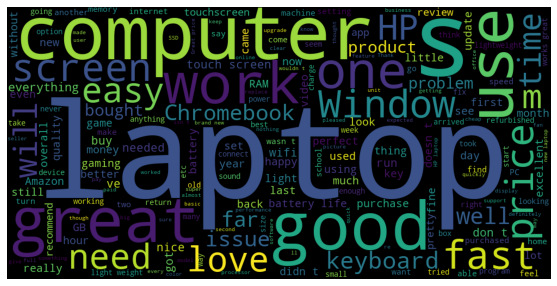

In [85]:
import matplotlib.pyplot as plt
wordcloud = WordCloud(width = 1000, height = 500,stopwords=stopwords).generate(total_text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [86]:
#Some of the positive keywords are fast,battery life, screen time, battery, life, keyboard

In [87]:
negative=Negative_Reviews[0:]
total_negative_text= (' '.join(Negative_Reviews['Review']))

In [88]:
negative

,Reviewer,Review,Product_Name,Reviewed_at,Date_of_Review,Stars_out_of_5,Polarity
24,Joshua Faryon,It was running smooth for the first month or s...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"July 9, 2022",1.0,-0.041567
27,Michael W.,Received the item and during setup it stopped ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"November 16, 2022",5.0,-0.055556
29,Michael Prackwieser,Terrible to send out a computer that has been ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"November 16, 2022",1.0,-0.500000
39,Ramesh,little expensive,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"August 1, 2022",5.0,-0.343750
42,Tito Soto,Haven't had a chance to play with it yet. I'm ...,"Newest HP 14"" HD Laptop, Windows 11, Intel Cel...",the United States,"November 24, 2022",5.0,-0.400000
...,...,...,...,...,...,...,...
1412,Teacherlady,I did not know that the Chromebook I purchased...,HP-Chromebook-Anti-Glare-Processor,the United States,"March 6, 2021",1.0,-0.131818
1419,Amazon Customer,Don't ever buy a Chromebook it's a waste of mo...,HP-Chromebook-Anti-Glare-Processor,the United States,"September 12, 2021",1.0,-0.488281
1424,Luis contreras,It can not be used it is very poor quality,HP-Chromebook-Anti-Glare-Processor,the United States,"July 9, 2021",1.0,-0.520000
1444,Kira,"Dumb asf, AMAZON KEEP FUCKIN UP MY MONEY",HP-Chromebook-Anti-Glare-Processor,the United States,"August 18, 2021",2.0,-0.375000


In [89]:
total_negative_text

'It was running smooth for the first month or so I had it, and then randomly after booting up a certain steam game it would always randomly turn off the screen and leave the actual computer on. I couldn\'t turn the screen back on I had to restart the whole laptop. It would happen about 3 times per actual game playing session. And then I noticed it was way slower when booting up after not being used for a while. It would sit on desktop and take 3 minutes to open either Spotify, steam, google, or anything. And today it gave me the blue screen of death. I never downloaded anything fishy, just steam games Spotify and then I browsed YouTube every now and then. I remember buying a laptop from bestbuy like 3 years ago for 400$ cad and it was almost as fast as this laptop which is 1400& cad. I mean the laptop worked again after I restarted it a few times, which is good. It still sorta works. But who knows how much worse it will get over time. Might just return it instead of getting a tech guy 

In [90]:
total_negative_text=re.sub(' +',' ',total_negative_text) #removing spaces

In [91]:
total_negative_text                                           

'It was running smooth for the first month or so I had it, and then randomly after booting up a certain steam game it would always randomly turn off the screen and leave the actual computer on. I couldn\'t turn the screen back on I had to restart the whole laptop. It would happen about 3 times per actual game playing session. And then I noticed it was way slower when booting up after not being used for a while. It would sit on desktop and take 3 minutes to open either Spotify, steam, google, or anything. And today it gave me the blue screen of death. I never downloaded anything fishy, just steam games Spotify and then I browsed YouTube every now and then. I remember buying a laptop from bestbuy like 3 years ago for 400$ cad and it was almost as fast as this laptop which is 1400& cad. I mean the laptop worked again after I restarted it a few times, which is good. It still sorta works. But who knows how much worse it will get over time. Might just return it instead of getting a tech guy 

(-0.5, 9999.5, 4999.5, -0.5)

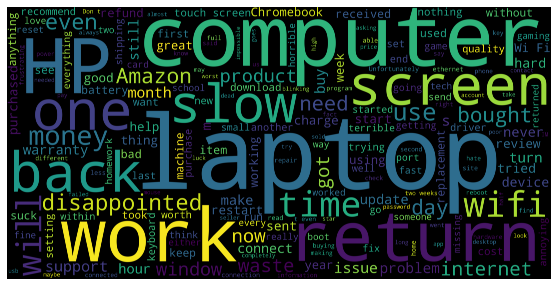

In [92]:
wordcloud = WordCloud(width = 10000, height = 5000,stopwords=stopwords).generate(total_negative_text)
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')

In [93]:
#Some of the negative keywords most frequently used are :- slow, screen, wifi, update issues, internet

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import spacy
import warnings
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.mixture import GaussianMixture

nltk.download('stopwords') 
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jimit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Machine learning Algorithms

In [95]:
data=df

In [96]:
data.drop(columns=['Polarity'],inplace=True)

In [97]:
data.describe()

,Stars_out_of_5
count,1507.000000
mean,3.711347
std,1.641800
min,1.000000
25%,2.000000
50%,5.000000
75%,5.000000
max,5.000000


In [98]:
data

,Reviewer,Review,Product_Name,Reviewed_at,Date_of_Review,Stars_out_of_5
0,jackhandy,i do audio work for video games: creating sfx ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"September 24, 2022",5.0
1,Trayson Lancaster,"I've had this laptop for a week now, which has...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"November 4, 2022",4.0
2,Suraj,Its a pretty good laptop very fast and good wi...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"December 2, 2022",4.0
3,Will Coats,No Backlight on the keyboard and the keys are ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"November 10, 2022",4.0
4,Puck,This is by far the fastest laptop I have ever ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"September 24, 2022",5.0
...,...,...,...,...,...,...
1502,Fernanda del Río,"Light, easy to use, excellent value for money....",HP-Chromebook-Anti-Glare-Processor,Mexico,"July 11, 2021",5.0
1503,Emmanuel,It is very light and practical! I loved!,HP-Chromebook-Anti-Glare-Processor,Mexico,"July 16, 2021",5.0
1504,MARIO C.,"Good device, fair payment for what it provides",HP-Chromebook-Anti-Glare-Processor,Mexico,"July 3, 2021",5.0
1505,Enrique Valencia,A very good computer for a very affordable price,HP-Chromebook-Anti-Glare-Processor,Mexico,"June 27, 2021",5.0


In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Reviewer        1507 non-null   object 
 1   Review          1507 non-null   object 
 2   Product_Name    1507 non-null   object 
 3   Reviewed_at     1507 non-null   object 
 4   Date_of_Review  1507 non-null   object 
 5   Stars_out_of_5  1507 non-null   float64
dtypes: float64(1), object(5)
memory usage: 70.8+ KB


In [100]:
data['Product_Name'].value_counts()

HP-Generation-i5-1135G7-Graphics-15                                                                        360
HP-Chromebook-Anti-Glare-Processor                                                                         320
HP-Chromebook-11-inch-Laptop                                                                               208
HP-Portable-Micro-Edge-Anti-Glare-14                                                                       130
HP-Generation-i5-1135G7-Graphics-17                                                                         98
Newest-HP-R5-5500U-Microphone-Windows                                                                       91
Newest HP 14" HD Laptop, Windows 11, Intel Celeron Dual-Core Processor Up to 2.60GHz, 4GB RAM, 64GB SSD     90
HP-Pavilion-Micro-EDGE-Processor-15                                                                         90
HP-Generation-Graphics-Bluetooth-17                                                                         80
2

In [101]:
data.isnull().sum()

Reviewer          0
Review            0
Product_Name      0
Reviewed_at       0
Date_of_Review    0
Stars_out_of_5    0
dtype: int64

In [102]:
data

,Reviewer,Review,Product_Name,Reviewed_at,Date_of_Review,Stars_out_of_5
0,jackhandy,i do audio work for video games: creating sfx ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"September 24, 2022",5.0
1,Trayson Lancaster,"I've had this laptop for a week now, which has...","2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"November 4, 2022",4.0
2,Suraj,Its a pretty good laptop very fast and good wi...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"December 2, 2022",4.0
3,Will Coats,No Backlight on the keyboard and the keys are ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"November 10, 2022",4.0
4,Puck,This is by far the fastest laptop I have ever ...,"2022 Newest HP Pavilion 15.6"" FHD 1080P IPS La...",the United States,"September 24, 2022",5.0
...,...,...,...,...,...,...
1502,Fernanda del Río,"Light, easy to use, excellent value for money....",HP-Chromebook-Anti-Glare-Processor,Mexico,"July 11, 2021",5.0
1503,Emmanuel,It is very light and practical! I loved!,HP-Chromebook-Anti-Glare-Processor,Mexico,"July 16, 2021",5.0
1504,MARIO C.,"Good device, fair payment for what it provides",HP-Chromebook-Anti-Glare-Processor,Mexico,"July 3, 2021",5.0
1505,Enrique Valencia,A very good computer for a very affordable price,HP-Chromebook-Anti-Glare-Processor,Mexico,"June 27, 2021",5.0


In [103]:
import spacy

In [104]:
!python -m spacy download en_core_web_sm


[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [105]:
nlp = spacy.load("en_core_web_sm")  

In [106]:
from nltk.corpus import stopwords
import string
import re
sents = data['Review']
stop = stopwords.words('english')

In [107]:
def tokenize(doc):
  doc=re.sub('\n\n','. ',doc)
  tokens = [token.lemma_.lower() for token in nlp(doc) if not(token.is_stop or token.is_punct) and token.text]
  return tokens

In [108]:
clean_sents = [' '.join(tokenize(i)) for i in sents]
for i in range(3):
  print(clean_sents[i],'\n\n')

audio work video game create sfx daw(digital audio workstation compose midi mockup score kontakt ton heavy ram use orchestral sample library 32 g ram 1 tb ssd huge boon audio work use ableton reaper daw load super snappy kontakt heavy project load ultra fast versus pc tower powerful laptop run fairly quiet heavy cpu load compose piece music game throne video game run 60 70 cpu fastest computer(the pc tower hp laptop clock cool 50 have able ton cpu intense plugin ozone8 reaktor run daw project problem able turn cpu 0 windows power management panel set cooling passive- cause laptop run slower basically run silent heat generation perfect need record foley voice use creature game turn cpu speed compose integrate sound music game graphic card not 100 good be able run unity hook sound 3d game way lag 2k screen not gaming pc level integration graphic card like able easily run late great fps setting stream twitch time drop frame rate(but know maybe u not test fully be confident run game regard

In [109]:
data['Clean_Reviews'] = clean_sents

In [110]:
df = data[['Review','Clean_Reviews']]

In [111]:
df.head(10)

,Review,Clean_Reviews
0,i do audio work for video games: creating sfx ...,audio work video game create sfx daw(digital a...
1,"I've had this laptop for a week now, which has...",laptop week time gauge issue speaker volume au...
2,Its a pretty good laptop very fast and good wi...,pretty good laptop fast good game problem shor...
3,No Backlight on the keyboard and the keys are ...,backlight keyboard key black dark grey writing...
4,This is by far the fastest laptop I have ever ...,far fast laptop own start quickly shut quickly...
5,It worth,worth
6,My wife loves it.,wife love
7,The Ryzen chip is very fast and there is no la...,ryzen chip fast lag video response onboard rad...
8,"I bought this laptop for scientific computing,...",buy laptop scientific computing wait 8-core pr...
9,I like this HP Pavilion. I've owned several HP...,like hp pavilion own hp computer printer curre...


In [112]:
pip install vaderSentiment


Note: you may need to restart the kernel to use updated packages.


In [113]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

def polarity(text):    
    score = analyser.polarity_scores(text)
    if score['compound'] < 0 :
      return 'Negative'
    elif score['compound'] > 0 :
      return 'Positive'
    else:
      return 'Neutral'

In [114]:
polarity('Im not as bad as GG')

'Positive'

In [115]:
df['Polarity'] = df['Clean_Reviews'].apply(polarity)
df.head()

,Review,Clean_Reviews,Polarity
0,i do audio work for video games: creating sfx ...,audio work video game create sfx daw(digital a...,Positive
1,"I've had this laptop for a week now, which has...",laptop week time gauge issue speaker volume au...,Positive
2,Its a pretty good laptop very fast and good wi...,pretty good laptop fast good game problem shor...,Positive
3,No Backlight on the keyboard and the keys are ...,backlight keyboard key black dark grey writing...,Positive
4,This is by far the fastest laptop I have ever ...,far fast laptop own start quickly shut quickly...,Positive


In [116]:
pos_reviews = df[df['Polarity'] == 'Positive']
pos_reviews

,Review,Clean_Reviews,Polarity
0,i do audio work for video games: creating sfx ...,audio work video game create sfx daw(digital a...,Positive
1,"I've had this laptop for a week now, which has...",laptop week time gauge issue speaker volume au...,Positive
2,Its a pretty good laptop very fast and good wi...,pretty good laptop fast good game problem shor...,Positive
3,No Backlight on the keyboard and the keys are ...,backlight keyboard key black dark grey writing...,Positive
4,This is by far the fastest laptop I have ever ...,far fast laptop own start quickly shut quickly...,Positive
...,...,...,...
1501,"It broke my expectations, I was expecting some...",break expectation expect low quality excellent...,Positive
1502,"Light, easy to use, excellent value for money....",light easy use excellent value money wonderful,Positive
1503,It is very light and practical! I loved!,light practical love,Positive
1504,"Good device, fair payment for what it provides",good device fair payment provide,Positive


In [117]:
neg_reviews = df[df['Polarity'] == 'Negative']
neg_reviews

,Review,Clean_Reviews,Polarity
7,The Ryzen chip is very fast and there is no la...,ryzen chip fast lag video response onboard rad...,Negative
13,Mic doesn't pick up well when speaker is off o...,mic pick speaker edge camera fast ryzen 5 murd...,Negative
20,"I purchased this in March. Right away, the uni...",purchase march right away unit go sleep wake p...,Negative
27,Received the item and during setup it stopped ...,receive item setup stop work go black screen c...,Negative
29,Terrible to send out a computer that has been ...,terrible send computer send check,Negative
...,...,...,...
1444,"Dumb asf, AMAZON KEEP FUCKIN UP MY MONEY",dumb asf amazon fuckin money,Negative
1459,I thought I was buying into a cheap laptop!! B...,think buy cheap laptop nope work awesome let,Negative
1464,"Brand New! No scratches or anything like ""Used...",brand new scratch like mark work problem fast,Negative
1486,"Impeccable, but the keyboard and mousepad are ...",impeccable keyboard mousepad lense premium qua...,Negative


In [118]:
neu_reviews = df[df['Polarity'] == 'Neutral']
neu_reviews

,Review,Clean_Reviews,Polarity
25,Very fast and loaded with all the Hp & MS Wind...,fast load hp ms windows office tool run,Neutral
32,It never worked as it should it seemed to be r...,work recondition,Neutral
33,,,Neutral
39,little expensive,little expensive,Neutral
46,,,Neutral
...,...,...,...
1469,still holding up!,hold,Neutral
1472,There was no computer in the box that arrived....,computer box arrive cord box laptop,Neutral
1482,I bought it to work from home. I've been using...,buy work home couple week run smoothly 5/5,Neutral
1492,return it and buy another with windows system,return buy window system,Neutral


# SVM Algorithm

In [127]:
from sklearn.model_selection import train_test_split
train_reviews, test_reviews, train_polarity, test_polarity = train_test_split(df['Clean_Reviews'], df['Polarity'], test_size=0.25, random_state=42)

In [128]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, max_df=0.95, min_df=0.005, strip_accents='unicode', sublinear_tf=True)
train_docs_tfidf = vectorizer.fit_transform(train_reviews)
test_docs_tfidf = vectorizer.transform(test_reviews)

In [129]:
from sklearn.svm import LinearSVC
model = LinearSVC(C = 0.6).fit(train_docs_tfidf,train_polarity)
predicted_polarity = model.predict(test_docs_tfidf)

In [130]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(test_polarity,predicted_polarity))
print(classification_report(test_polarity,predicted_polarity))

[[ 39   5  23]
 [  0  36  14]
 [  4   6 250]]
              precision    recall  f1-score   support

    Negative       0.91      0.58      0.71        67
     Neutral       0.77      0.72      0.74        50
    Positive       0.87      0.96      0.91       260

    accuracy                           0.86       377
   macro avg       0.85      0.75      0.79       377
weighted avg       0.86      0.86      0.85       377



# Naive Bayes Algorithm

In [132]:
from sklearn.naive_bayes import MultinomialNB
model2 = MultinomialNB(alpha = 0.005).fit(train_docs_tfidf,train_polarity)
predicted_polarity = model2.predict(test_docs_tfidf)
print(confusion_matrix(test_polarity,predicted_polarity))

print(classification_report(test_polarity,predicted_polarity))

[[ 26   2  39]
 [  2  10  38]
 [  1   1 258]]
              precision    recall  f1-score   support

    Negative       0.90      0.39      0.54        67
     Neutral       0.77      0.20      0.32        50
    Positive       0.77      0.99      0.87       260

    accuracy                           0.78       377
   macro avg       0.81      0.53      0.58       377
weighted avg       0.79      0.78      0.74       377

